In [23]:
import pandas as pd

# Caminho do arquivo (com raw string para evitar erros com barras invertidas)
caminho = r"C:\Users\erica\Documents\Pos-Unifor\DataOps\_ORDERS__202505100950.csv"

# Lê o CSV e armazena no DataFrame
df = pd.read_csv(caminho)

# Exibe as 5 primeiras linhas do DataFrame
print(df.head())


                                    order_id                     created_at  \
0  ORDE_0012e5aa-f6bc-4ade-a094-f8e087a172d1  2024-02-16 03:32:36.000 -0300   
1  ORDE_0012e5aa-f6bc-4ade-a094-f8e087a172d1  2024-02-16 03:32:36.000 -0300   
2  ORDE_0012e5aa-f6bc-4ade-a094-f8e087a172d1  2024-02-16 03:32:36.000 -0300   
3  ORDE_003de6f6-3487-478c-9f2c-a403d235eec1  2024-07-02 05:51:46.000 -0300   
4  ORDE_003de6f6-3487-478c-9f2c-a403d235eec1  2024-07-02 05:51:46.000 -0300   

                                customer_id  \
0  CID_a24f4092-6237-4c6d-8d28-d6208afdcefa   
1  CID_a24f4092-6237-4c6d-8d28-d6208afdcefa   
2  CID_a24f4092-6237-4c6d-8d28-d6208afdcefa   
3  CID_7b92ed6e-a295-4660-81ec-f791c43dab55   
4  CID_7b92ed6e-a295-4660-81ec-f791c43dab55   

                                   charge_id    item_id  item_price  item_qtd  \
0  CHAR_05e89457-81d7-4c47-9629-9b84d1f4d6a9   SH06-MAR        94.9         1   
1  CHAR_05e89457-81d7-4c47-9629-9b84d1f4d6a9  TP01-CHCT        62.9         1   

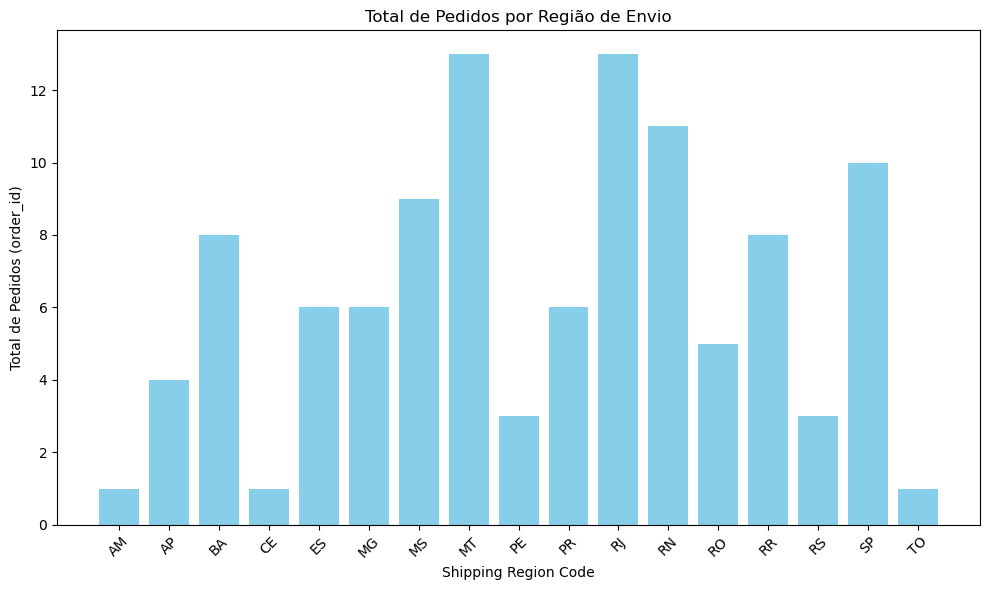

In [24]:
# Agrupamento por shipping_region_code e contagem de order_id
agrupado = df.groupby('shipping_region_code')['order_id'].count().reset_index()

# Renomear a coluna para melhor legenda no gráfico
agrupado.columns = ['shipping_region_code', 'total_orders']

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(agrupado['shipping_region_code'], agrupado['total_orders'], color='skyblue')
plt.xlabel('Shipping Region Code')
plt.ylabel('Total de Pedidos (order_id)')
plt.title('Total de Pedidos por Região de Envio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


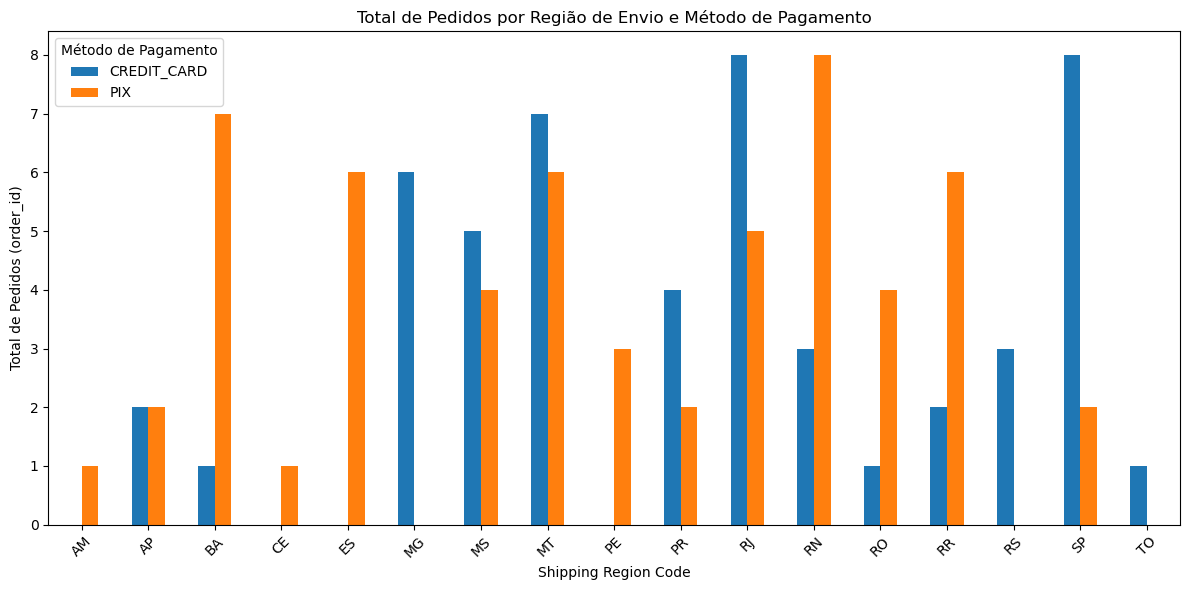

In [25]:
# Agrupamento por shipping_region_code e charge_payment_method, contando os order_id
agrupado = df.groupby(['shipping_region_code', 'charge_payment_method'])['order_id'].count().reset_index()

# Pivotar para formato de tabela com métodos de pagamento como colunas
pivotado = agrupado.pivot(index='shipping_region_code', columns='charge_payment_method', values='order_id').fillna(0)

# Plotar gráfico de barras agrupadas
pivotado.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Shipping Region Code')
plt.ylabel('Total de Pedidos (order_id)')
plt.title('Total de Pedidos por Região de Envio e Método de Pagamento')
plt.xticks(rotation=45)
plt.legend(title='Método de Pagamento')
plt.tight_layout()
plt.show()


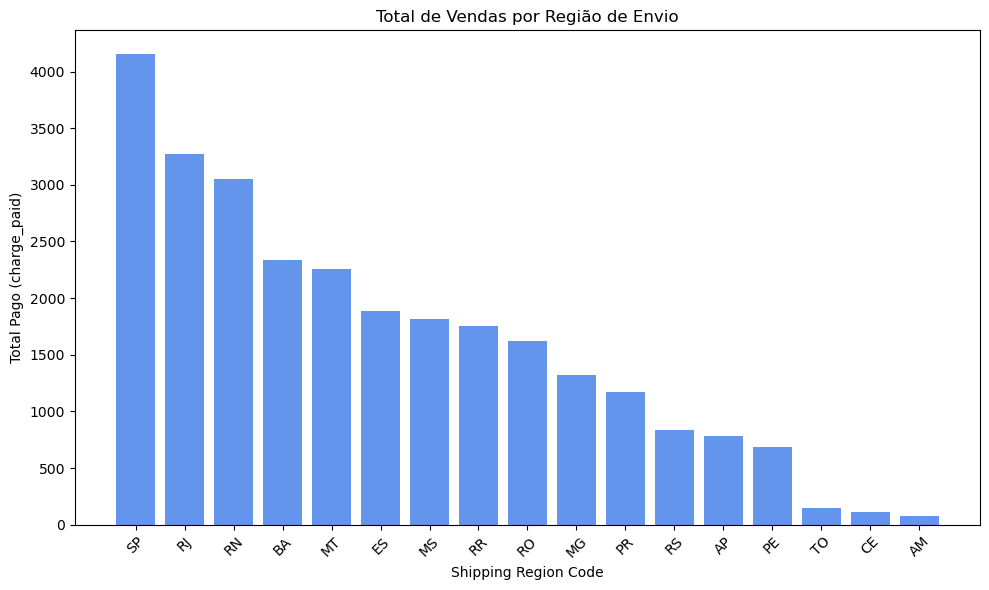

In [26]:
# Agrupar e somar o valor de charge_paid por shipping_region_code
agrupado = df.groupby('shipping_region_code')['charge_paid'].sum().reset_index()

# Ordenar do maior para o menor
agrupado = agrupado.sort_values(by='charge_paid', ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(agrupado['shipping_region_code'], agrupado['charge_paid'], color='cornflowerblue')
plt.xlabel('Shipping Region Code')
plt.ylabel('Total Pago (charge_paid)')
plt.title('Total de Vendas por Região de Envio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


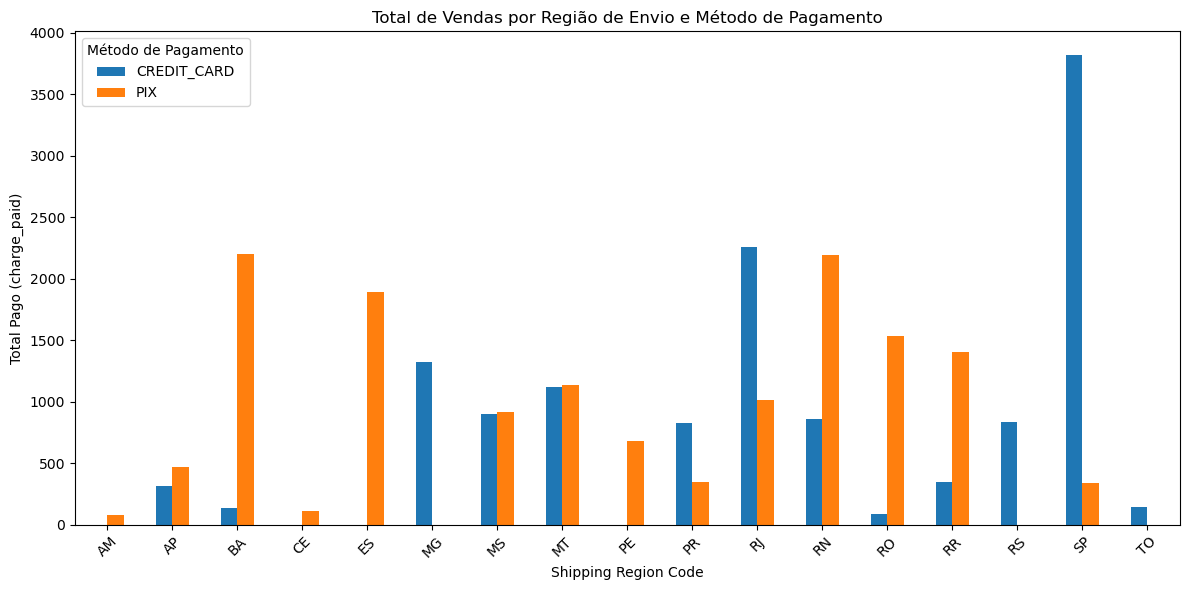

In [27]:
# Garantir que charge_paid seja numérico (caso necessário)
df['charge_paid'] = pd.to_numeric(df['charge_paid'], errors='coerce')

# Agrupamento por região e método de pagamento, somando charge_paid
agrupado = df.groupby(['shipping_region_code', 'charge_payment_method'])['charge_paid'].sum().reset_index()

# Pivotar para ter métodos de pagamento como colunas
pivotado = agrupado.pivot(index='shipping_region_code', columns='charge_payment_method', values='charge_paid').fillna(0)

# Plotar gráfico de barras agrupadas
pivotado.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Shipping Region Code')
plt.ylabel('Total Pago (charge_paid)')
plt.title('Total de Vendas por Região de Envio e Método de Pagamento')
plt.xticks(rotation=45)
plt.legend(title='Método de Pagamento')
plt.tight_layout()
plt.show()


C:\Users\erica\AppData\Local\Temp\ipykernel_15912\3366058841.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['mes'] = df['created_at'].dt.to_period('M').astype(str)


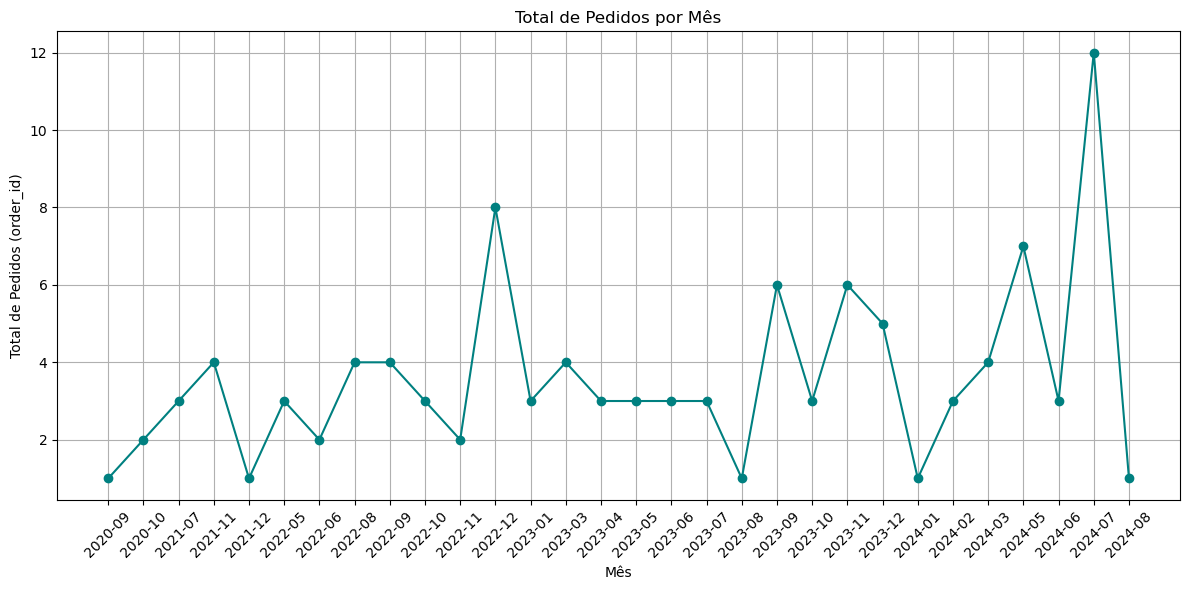

In [28]:
# Converter 'created_at' para datetime, considerando fuso horário
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Criar uma nova coluna com o mês e ano no formato 'YYYY-MM'
df['mes'] = df['created_at'].dt.to_period('M').astype(str)

# Agrupar por mês e contar order_id
agrupado = df.groupby('mes')['order_id'].count().reset_index()
agrupado.columns = ['Mês', 'Total de Pedidos']

# Ordenar os meses cronologicamente
agrupado = agrupado.sort_values(by='Mês')

# Plotar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(agrupado['Mês'], agrupado['Total de Pedidos'], marker='o', linestyle='-', color='teal')
plt.xlabel('Mês')
plt.ylabel('Total de Pedidos (order_id)')
plt.title('Total de Pedidos por Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\erica\AppData\Local\Temp\ipykernel_15912\3863904050.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['mes'] = df['created_at'].dt.to_period('M').astype(str)


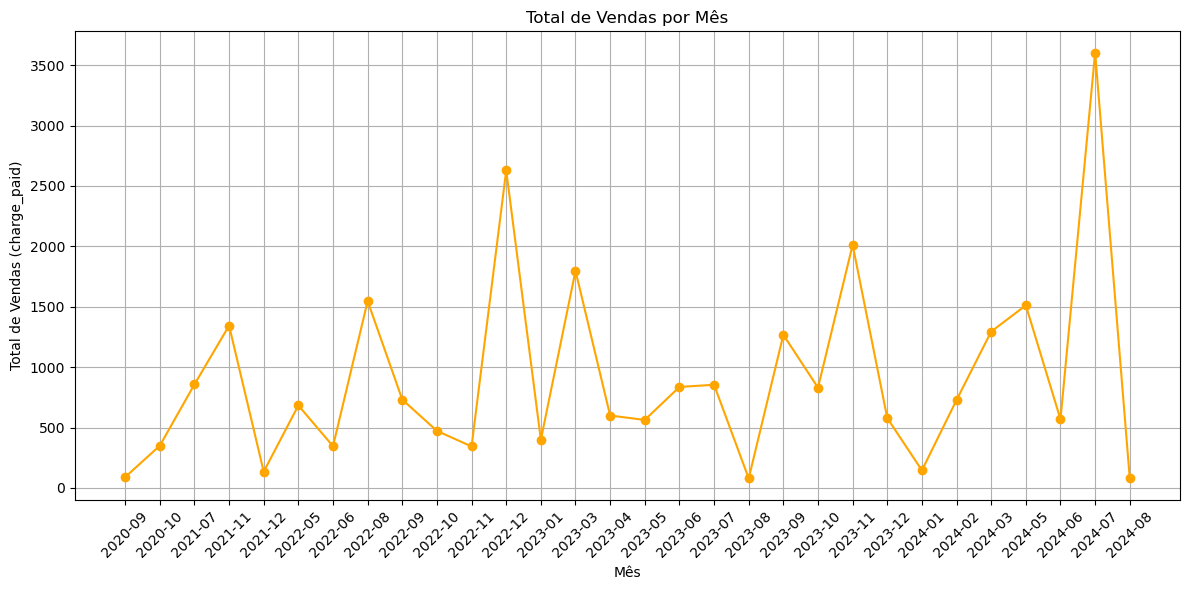

In [29]:
# Converter 'created_at' para datetime
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Converter 'charge_paid' para numérico (caso necessário)
df['charge_paid'] = pd.to_numeric(df['charge_paid'], errors='coerce')

# Criar coluna com mês e ano no formato 'YYYY-MM'
df['mes'] = df['created_at'].dt.to_period('M').astype(str)

# Agrupar por mês e somar charge_paid
agrupado = df.groupby('mes')['charge_paid'].sum().reset_index()
agrupado.columns = ['Mês', 'Total Pago']

# Ordenar os meses cronologicamente
agrupado = agrupado.sort_values(by='Mês')

# Plotar gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(agrupado['Mês'], agrupado['Total Pago'], marker='o', linestyle='-', color='orange')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas (charge_paid)')
plt.title('Total de Vendas por Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


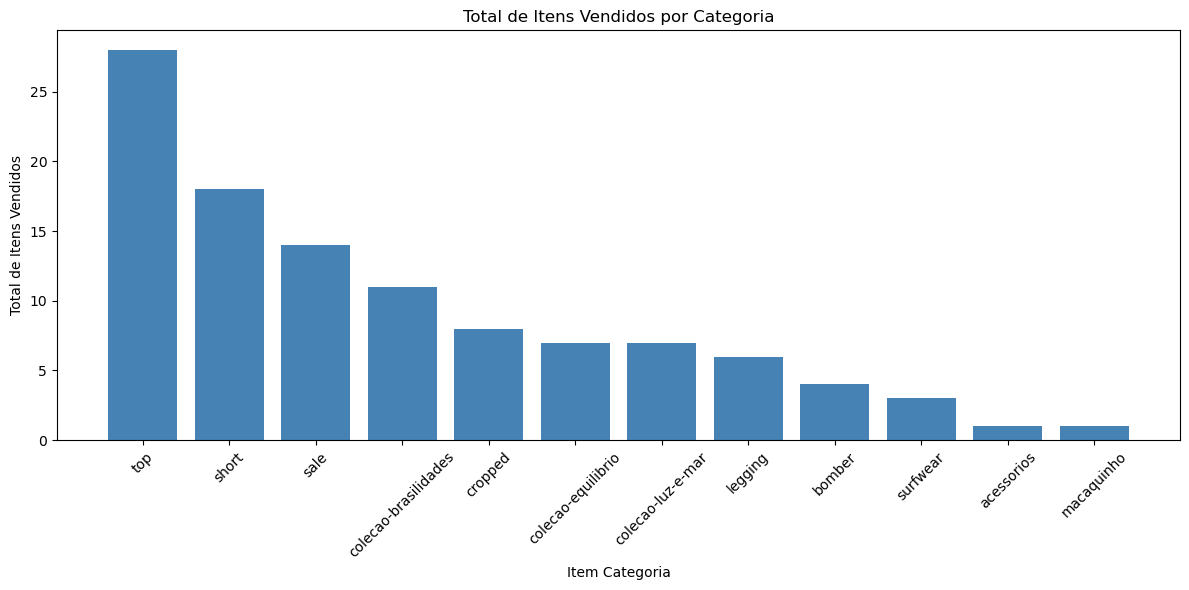

In [31]:
# Garantir que 'item_qtd' seja numérico
df['item_qtd'] = pd.to_numeric(df['item_qtd'], errors='coerce')

# Agrupar por item_id e somar as quantidades vendidas
agrupado = df.groupby('item_categoria')['item_qtd'].sum().reset_index()
agrupado.columns = ['Item ID', 'Total de Itens Vendidos']

# Ordenar por quantidade de itens vendidos
agrupado = agrupado.sort_values(by='Total de Itens Vendidos', ascending=False)

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(agrupado['Item ID'], agrupado['Total de Itens Vendidos'], color='steelblue')
plt.xlabel('Item Categoria')
plt.ylabel('Total de Itens Vendidos')
plt.title('Total de Itens Vendidos por Categoria')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
